# Temporal Series Project
## Table of contents

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
    * [3.1 Drop Null Values](#c3-1)
    * [3.2 Drop Duplicate Information](#c3-2)
    * [3.2 Drop Irrelevant Information](#c3-3)
* [4. Temporal Series Analysis](#c4)
    * [4.1 Tensor Analysis](#c4-1)
    * [4.2 Trend Analysis](#c4-2)
    * [4.3 Stationarity](#c4-3)
    * [4.4 Variability](#c4-4)
    * [4.5 Autocorrelation](#c4-5)
* [5. Machine Learning](#c5)
    * [5.1 Data Preparation](#c5-1)
    * [5.2 Model Creation and Training](#c5-2)
    * [5.3 Model Evaluation](#c5-3)
    * [5.4 Model Prediction](#c5-4)

## 0. Problem Statement <a id='c0'></a>

The objective of this exercise is to analyze the rithm of sales since the company foundation and to create a model to predict future results in order to properly dimension the warehouse space required.

## 1. Importing libraries <a id='c1'></a>

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import os
from pickle import dump

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## 2. Data Collection <a id='c2'></a>

In [201]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'

def get_data(URL:str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=',')
    total_data.head()
    return total_data

get_data(URL)
total_data = get_data(URL)
print(total_data.head())
ts = total_data['sales']

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


## 3. Exploration and Data Cleaning <a id='c3'></a>

#### 3.1 Drop Null Values <a id='c3-1'></a>

In this case, we don't delete any row beacause there is no duplicated data

In [202]:
total_data.isna().sum()

date     0
sales    0
dtype: int64

#### 3.2 Drop Duplicate Information <a id='c3-2'></a>

Since there is no duplicated rows we won't delete any data

In [203]:
rows = total_data.shape[0]
duplicated_rows = total_data.duplicated().sum()
print(f'We have {duplicated_rows} of {rows} rows duplicated')

We have 0 of 366 rows duplicated


#### 3.3 Drop Irrelevant Information <a id='c3-3'></a>

Since all data is relevant, we don't delete any column

## 4. Temporal Series Analysis <a id='c4'></a>

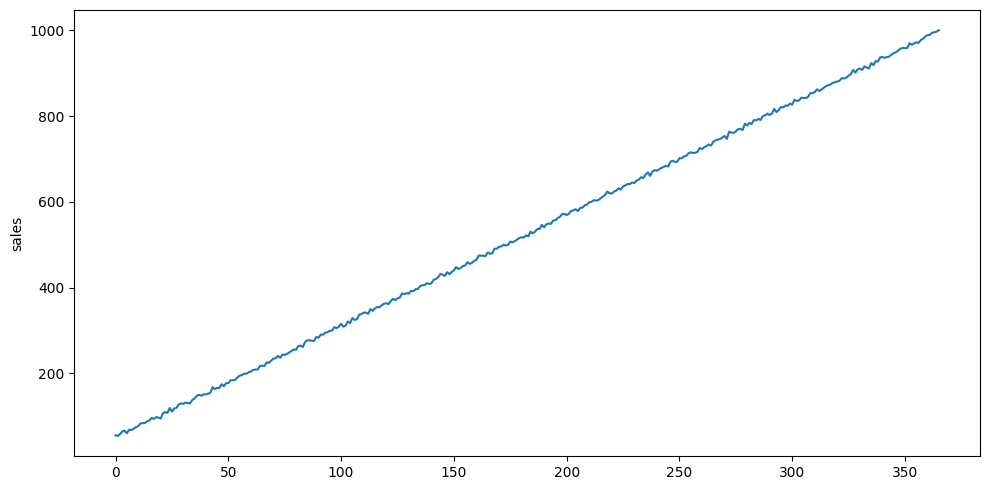

In [204]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()
plt.show()

### 4.1 Tensor Analysis <a id='c4-1'></a>

In [205]:
tensor = 30
decomposition = seasonal_decompose(ts, period = tensor)
decomposition

We've determined 30 as the values of the **tensor** as the sales date are registered every day.

#### 4.2 Tendencie Analysis <a id='c4-2'></a>

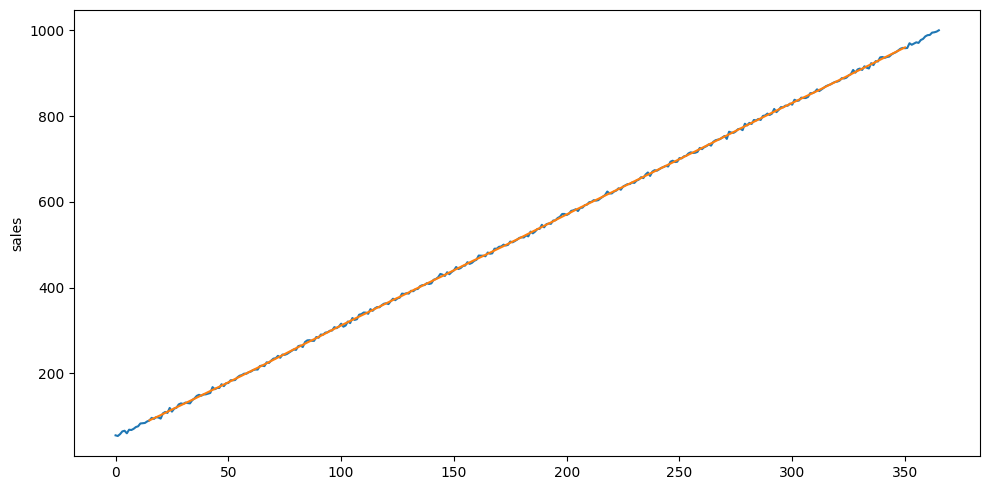

In [206]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

The trend of the temporal series sales shows a *lineal and positive* sales growth over time. This suggest that the series wouldn't be stational since it's properties such as mean or variance will change in the next future.

### 4.3 Stationallity <a id='c4-3'></a>

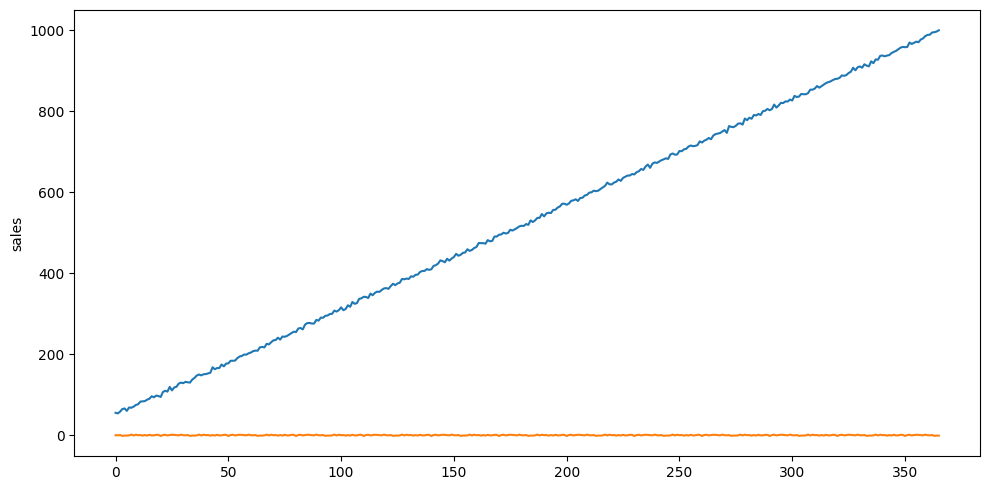

In [207]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [208]:
def test_stationarity(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Results of Dickey-Fuller Test:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

As shown in the plot and the test we can conclude that the temporal serie *isn't stationary*.
As the p-value is higher than 0.05 we can't decline the nule hypothesis (H0).

## 4.4 Variability <a id='c4-4'></a>

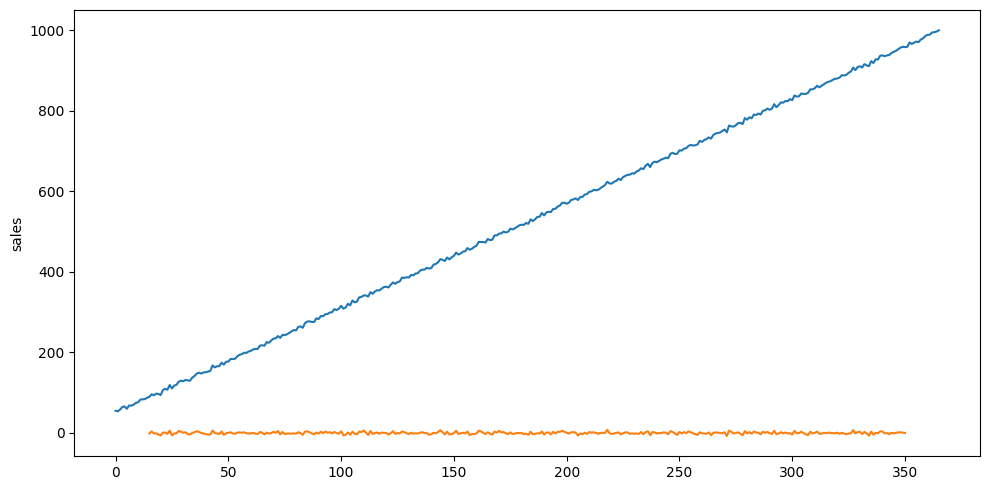

In [209]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

Based on this **variability** plot, the residuals are *constant* over time. This indicates that unpredictable data is not increasing or decreasing.

### 4.5 Autocorrelation <a id='c4-5'></a>

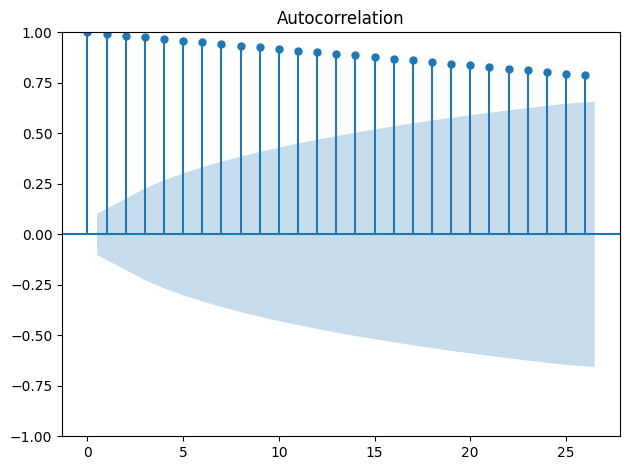

In [210]:
plot_acf(ts)

plt.tight_layout()

plt.show()

We have a strong dependence on its past values which slightly decreases over time.

## 5. Machine Learning <a id='c5'></a>

### 5.1 Data Preparation <a id='c5-1'></a>

We'll prepare train and test data for the model

In [211]:
test_size = 30
train = ts[:-test_size]
test = ts[-test_size:]

### 5.2 Model Creation and Training <a id='c5-2'></a>

In [212]:
test_stationarity(ts)

Results of Dickey-Fuller Test:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [213]:
model = auto_arima(train, seasonal=True, trace=True, m = 7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1698.890, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1933.617, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1816.472, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2035.035, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=1696.276, Time=0.76 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=1698.369, Time=0.41 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=1696.643, Time=1.28 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=1695.475, Time=1.03 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=1696.463, Time=1.08 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=1695.027, Time=1.78 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=1697.461, Time=1.48 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(1,1,2)(2,0,1)[7] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(2,1,1)(2,0,1)[7] intercept   : AIC=inf, T

In [214]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  336
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 7)   Log Likelihood                -840.748
Date:                            Fri, 15 Aug 2025   AIC                           1691.495
Time:                                    10:08:15   BIC                           1710.566
Sample:                                         0   HQIC                          1699.098
                                            - 336                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3846      0.212     11.226      0.000       1.968       2.801
ar.L1         -0.0803      0.054     -1.481      0.139      -0.187       0.026
ma.L1         -0.9599      0.018    -52.902      0.000      -0.996      -0.924
ar.S.L7        0.1501      0.056      2.671      0.008       0.040       0.260
sigma2         8.7999      0.714     12.322      0.000       7.400      10.200
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.99   Prob(JB):                         0.80
Heteroskedasticity (H):               0.84   Skew:                             0.07
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 5.3 Model Evaluation <a id='c5-3'></a>

In [215]:
forecast = model.predict(n_periods=len(test))
forecast

336    924.158347
337    926.902474
338    928.609678
339    932.092793
340    933.809255
341    935.742840
342    939.811361
343    942.081895
344    944.701071
345    947.164593
346    949.894700
347    952.359611
348    954.857116
349    957.675099
350    960.223184
351    962.823603
352    965.400657
353    968.017729
354    970.594992
355    973.177147
356    975.807410
357    978.397158
358    980.994762
359    983.588859
360    986.188962
361    988.783090
362    991.377953
363    993.980037
364    996.576039
365    999.173220
dtype: float64

In [216]:
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 2.07
Mean Squared Error (MSE): 6.62
Root Mean Squared Error (RMSE): 2.57


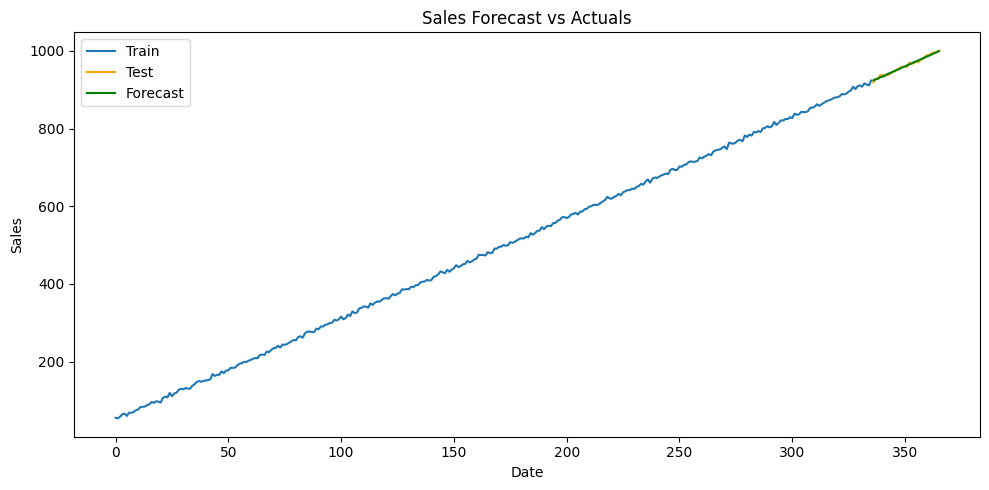

In [217]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data=train, label="Train")
sns.lineplot(data=test, label="Test", color='orange')
sns.lineplot(x=test.index, y=forecast, label="Forecast", color='green')

plt.title("Sales Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

This plot shows:
- The **blue** line which is the training data that contains all data that the model used for learning patterns.
- The **orange** line which is the test data that shows the real values on that period.
- The **green** line which is the prediction the model did.

### 5.4 Model Prediction <a id='c5-4'></a>

In [218]:
final_model = auto_arima(ts, seasonal=True, trace=True, m = 7)

future_forecast = final_model.predict(n_periods=10)
print("Prediction for next 10 days:")
print(future_forecast)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1966.396, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2209.657, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=1968.120, Time=0.22 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1968.220, Time=0.18 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1966.919, Time=0.08 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=1965.376, Time=0.48 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=1965.211, Time=0.68 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=1963.937, Time=0.60 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=1967.822, Time=0.19 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=2094.918, Time=0.42 sec
 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC=1

We save the model for persisting data

In [219]:
route = '../models/'
model_filename = os.path.join(route, 'temporal_series.pkl')
with open(model_filename, 'wb') as file:
    dump(final_model, file)
print(f'Model saved successfully as: {model_filename}')

Model saved successfully as: ../models/temporal_series.pkl


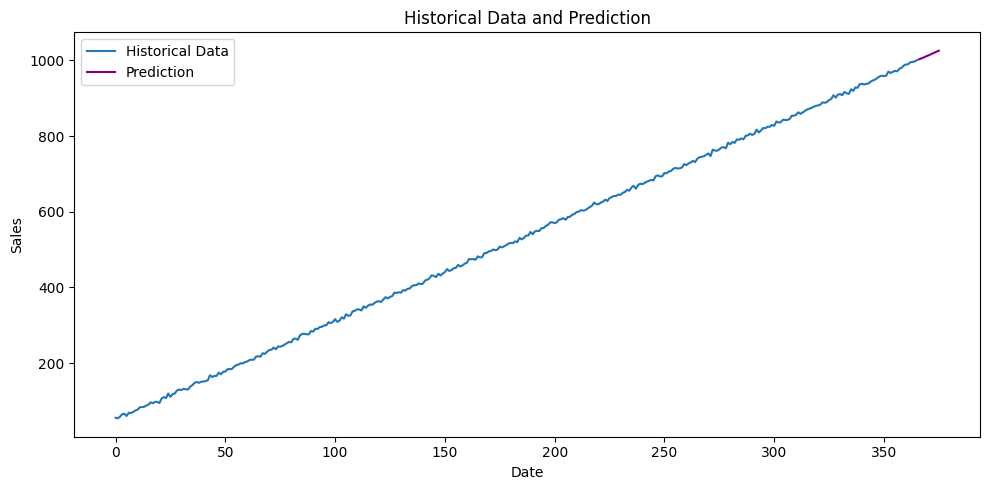

In [220]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts, label="Historical Data")
sns.lineplot(x=pd.RangeIndex(start=len(ts), stop=len(ts) + 10), y=future_forecast, label="Prediction", color='purple')

plt.title("Historical Data and Prediction")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

The model successfully identified a clear positive trend and a significant weekly seasonality in the sales data. It is, with a MAE of 2.07 and a RMSE of 2.57, a confident model for predicting short-term future sales.